In [ ]:
1. PCA on 3D dataset

Generate a dataset simulating 3 features, each with N entries (N being ). Each feature is made by random numbers generated according the normal distribution  with mean  and standard deviation , with . Generate the 3 variables  such that:
 is distributed as 
 is distributed as 
 is given by 
Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
Redefine the data according to the new basis from the PCA
Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the ,  and  projections) of scatter plots.

[1.72367651e+01 1.33349704e+00 7.95855803e-17]
[[-0.17601093  0.54986679 -0.81649658]
 [-0.4974356  -0.76543527 -0.40824829]
 [-0.84945746  0.3342983   0.40824829]]
[1.72380056e+01 1.33978264e+00 1.50205573e-31]
[[-0.17610749  0.54983587 -0.81649658]
 [-0.49730117 -0.76552262 -0.40824829]
 [-0.84951615  0.33414913  0.40824829]]
0 92.82
1 7.18
2 0.0
0 1 100.0
0 2 92.82
1 2 7.18


Text(456.8823529411765, 0.5, 'x3')

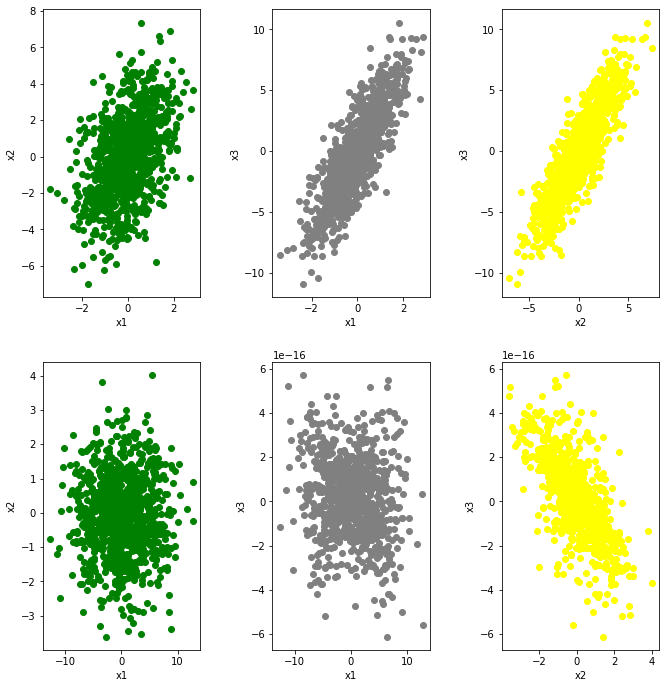

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd
N = 1000
mean = 0
std_1 = 1
std_2 = 2
p = 3

x1 = np.random.normal(mean, std_1, N)
x2 = x1 + np.random.normal(mean, std_2, N)
x3 = 2*x1 + x2
matrix = np.array([x1,x2,x3])
   
matrix_cov = np.cov(matrix)
l, V = la.eig(matrix_cov)
idx = np.argsort(l)[::-1]
l = l[idx]
V = V[:, idx]

print(np.real_if_close(l))
print(V)

U, S, Vt = la.svd(matrix)
eigenvalues = S**2 / (N-1)

print(np.real_if_close(eigenvalues))
print(U)

Lambda = np.diag(l)
trace = Lambda.trace()

for i in range(p):
    variability = abs(Lambda[i,i]/trace)
    print(i, round(variability*100,2))

for i in range(p):
    for j in range(i,p):
        if i != j:
            variability = abs((Lambda[i,i]+Lambda[j,j])/trace)
            print(i, j, round(variability*100,2))

Xp = np.dot(U.T, matrix)
fig, axe = plt.subplots(2, 3, figsize = (10,10))
axe[0,0].scatter(matrix[0], matrix[1], color = 'green')
axe[0,0].set_xlabel('x1', fontsize = 10)
axe[0,0].set_ylabel('x2', fontsize = 10)
axe[0,1].scatter(matrix[0], matrix[2], color = 'grey')
axe[0,1].set_xlabel('x1', fontsize = 10)
axe[0,1].set_ylabel('x3', fontsize = 10)
axe[0,2].scatter(matrix[1], matrix[2], color = 'yellow')
axe[0,2].set_xlabel('x2', fontsize = 10)
axe[0,2].set_ylabel('x3', fontsize = 10)
fig.tight_layout(pad=3.0)
axe[1,0].scatter(Xp[0], Xp[1], color = 'green')
axe[1,0].set_xlabel('x1', fontsize = 10)
axe[1,0].set_ylabel('x2', fontsize = 10)
axe[1,1].scatter(Xp[0], Xp[2], color = 'grey')
axe[1,1].set_xlabel('x1', fontsize = 10)
axe[1,1].set_ylabel('x3', fontsize = 10)
axe[1,2].scatter(Xp[1], Xp[2], color = 'yellow')
axe[1,2].set_xlabel('x2', fontsize = 10)
axe[1,2].set_ylabel('x3', fontsize = 10)

In [ ]:
2. PCA on a nD dataset

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the  and . Repeat the PCA procedure and compare the results with what you have obtained before.

In [2]:
noise = np.array([np.random.normal(mean, np.random.uniform(1,3)/20, N) for x in range(10)])
matrix_new = [matrix, noise]
matrix_new = np.stack([item for sublist in matrix_new for item in sublist])

matrix_cov = np.cov(matrix_new)
l, V = la.eig(matrix_cov)
idx = np.argsort(l)[::-1]
l = l[idx]
V = V[:, idx]

print(np.real_if_close(l))
print(V)

U, S, Vt = la.svd(matrix_new)
eigenvalues = S**2/(N-1)

print(eigenvalues)
print(U)

Lambda = np.diag(l)
trace = Lambda.trace()

variability = abs((Lambda[0,0]+Lambda[1,1])/trace)
print(round(variability*100,2))

[ 1.72368932e+01  1.33362890e+00  2.30868505e-02  2.11893319e-02
  1.80115271e-02  1.70274631e-02  1.42978899e-02  1.37352012e-02
  1.10132582e-02  9.00654760e-03  7.40433968e-03  3.01903848e-03
 -8.43255677e-16]
[[-1.76010918e-01 -5.49836570e-01  3.17894322e-03  1.72845507e-04
   9.79111469e-04 -3.28878960e-03 -1.25317675e-03 -9.84784570e-04
   2.71626026e-03  1.14292424e-03 -3.15506225e-04  4.17108039e-05
   8.16496581e-01]
 [-4.97432855e-01  7.65404519e-01 -3.64206426e-03  5.25855033e-04
  -2.24337182e-03  4.09445434e-03  1.12368414e-03  1.32254403e-03
  -3.34723884e-03 -4.84549946e-04  1.42127953e-04 -1.80121596e-05
   4.08248290e-01]
 [-8.49454692e-01 -3.34268621e-01  2.71582218e-03  8.71546048e-04
  -2.85148880e-04 -2.48312486e-03 -1.38266937e-03 -6.47025111e-04
   2.08528168e-03  1.80129854e-03 -4.88884498e-04  6.54094483e-05
  -4.08248290e-01]
 [ 6.49806072e-04  4.27229149e-03 -1.83129030e-01 -3.56455162e-03
  -7.05003787e-02 -9.44191005e-01 -5.75449223e-02  2.25335202e-01
   3